# Módulo 1: HTML: Requests y BeautifulSoup
## descargando la pagina (requests)
<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>
En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import requests
import pandas as pd

In [2]:
URL= "https://www.pagina12.com.ar/"
p12 = requests.get(URL) # enviamos una peticion a la pagina web
p12.status_code # consultamos el status de la consult, un 200 es repuesta existosa

200

In [3]:
# print(p12.text) # nos regresara en formato de texto plano el contenido html de la pagina
# print(p12.content) # lo mismo que .text pero el contenido estara dentro de una etiqueta que dice el tipo de contenido
# ejemplo: b'<! la b indica que son bits 

### acceso a los headers
recordando el curso 53 sabemos que cuando se ejecuta el modelo cliente servidor, tanto en la request http como en la response http hay headers que dan metadatos hacia el servidor, como de regreso en la http response 

In [4]:
p12.headers # headers de la response http
p12.request.headers # headers de la request http

{'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

En el header del request http 'User-Agent': 'python-requests/2.27.1' es un campo muy importante ya que le indica al servidor que la peticion probiene de un sistema automatizado de python, en ocaciones el server te bloqueara por esta variable 

In [5]:
print(p12.request.method) # nos indica el metodo que se uso para la peticion
print(p12.url) # nos muestra la url por donde se envia la response http, util cuando hay redireciones 

GET
https://www.pagina12.com.ar/


## Parsing Pagina (Beatiful Soup)


In [6]:
from bs4 import BeautifulSoup

In [7]:
sp = BeautifulSoup(p12.text, "lxml") # recibe el contenido html y el parser (codigo que separa el contenido, osea lxml)
# si "lxml" no funciona intenta 'html.parser' o si tienes linux pip3 install lxml 

In [8]:
#print(sp.prettify()) # nos regresara el contenido indentado, 
# ya que el DOM(document, object model) del html organiza en forma de arbol

In [9]:
sp.find("ul") # nos traera la 1er etiqueta(tag) ul
sp.find("ul", attrs={'class':'hot-sections'}) # regresa la tag ul con la class=hot-sections
secciones = sp.find("ul", attrs={'class':'main-sections'}).find_all('li')# # nos regresara un lista de todas las tag li de la busqueda previa
secciones

[<li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>]

In [10]:
seccion = secciones[0] # seleccionamos la primera tag li, un equivalente es secciones.a, secciones.find("a")
seccion 

<li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

### extrayendo informacion de las etiquetas
si recuerdas las clases de html de desarrollo web las etiquetas tienen: 
- atributos(id, class, urls) 
- texto 

In [11]:
# ahora podemos acceder mas facilmente a el contenido de la etiqueta li
print(seccion.a.get('href')) # asi obtenemos el ATRIBUTO link de la etiqueta a 
print(seccion.a.get_text())
print(seccion.text)

https://www.pagina12.com.ar/secciones/el-pais
El país
El país


In [12]:
[sec.text for sec in secciones] # para obtener todos los textos de las etiquetas li
links_secciones = [sec.a.get('href') for sec in secciones]  # para obtener todos los links de la etiquetas a 
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo']

#### el poder del scrapping
con la lista de enlaces ahora podriamos usar request para analizar cada pestaña, aqui inica el poder del scraping.
analizaremos la pagina de la seccion el pais

In [13]:
sec = requests.get(links_secciones[0])
print(sec.request.url)
print(sec.status_code)

https://www.pagina12.com.ar/secciones/el-pais
200


In [14]:
soup_seccion = BeautifulSoup(sec.text, 'lxml')
#print(soup_seccion.prettify())

si inspeccionas la página te daras cuenta que hay 3 diferentes titulos h2,h3,h4 que contienen la etiqueta "a" con los links a cada noticia de la seccion del pais. los 3 titulos comparten la peculiaridad de tener la clase title-list, con esto podemos extraer los lins de cada noticia en la pestaña. 
ten en consideracion que los links tienen esta forma:   
"/515409-alberto-fernandez-siempre-vamos-en-socorro-de-los-que-mas-ne"  
por lo que debemos añadirle la direccion de la pagina actual usando "sec.request.url" para que tengamos:  
"https://www.pagina12.com.ar/secciones/el-pais/515409-alberto-fernandez-siempre-vamos-en-socorro-de-los-que-mas-ne"

In [24]:
featured_article = soup_seccion.find_all(['h2','h3','h4'], # asi se seleccionan varias etiqeutas al mismo tiempo
                                        attrs={'class':'title-list'}) 
urls_de_seccion_pais = ['https://www.pagina12.com.ar' + art.a.get('href') for art in featured_article]
urls_de_seccion_pais

['https://www.pagina12.com.ar/516514-milagro-sala-y-un-antecedente-de-indulto-en-la-presidencia-d',
 'https://www.pagina12.com.ar/516512-juicio-politico-a-la-corte-el-gobierno-descarta-dictar-modif',
 'https://www.pagina12.com.ar/516500-elisa-carrio-y-gerardo-morales-avanzan-con-su-alianza-en-la-',
 'https://www.pagina12.com.ar/516497-rosario-gases-y-balas-de-goma-en-el-ultimo-dia-de-protestas',
 'https://www.pagina12.com.ar/516489-maria-eugenia-vidal-suma-a-dario-nieto-a-su-equipo-de-campan',
 'https://www.pagina12.com.ar/516478-el-ataque-a-farmacoop-el-primer-laboratorio-recuperado',
 'https://www.pagina12.com.ar/516444-cecilia-moreau-convoco-a-todos-los-diputados-y-diputadas-par',
 'https://www.pagina12.com.ar/516439-evo-morales-celebrara-el-dia-del-estado-plurinacional-de-bol',
 'https://www.pagina12.com.ar/516428-la-estrategia-de-jorge-capitanich-para-evitar-el-bloqueo-opo',
 'https://www.pagina12.com.ar/516375-movimientos-sociales-organizan-un-plan-de-lucha-en-rechazo-a',
 'https

para automatizar mas el proceso crearemos una funcion para que te regrese una lista a todas las noticias de una seccion

In [25]:
def get_link_from_section(section_url): # la funcion resivira el link a una de las secciones como: pais, deporte, etc
    sec = requests.get(section_url)
    soup_seccion = BeautifulSoup(sec.text, 'lxml')
    articles_title = soup_seccion.find_all(['h2','h3','h4'], attrs={'class':'title-list'}) 
    return ['https://www.pagina12.com.ar' + link.a.get('href') for link in articles_title]

urls_de_seccion_pais = get_link_from_section(links_secciones[0]) 
urls_de_seccion_pais

['https://www.pagina12.com.ar/516514-milagro-sala-y-un-antecedente-de-indulto-en-la-presidencia-d',
 'https://www.pagina12.com.ar/516512-juicio-politico-a-la-corte-el-gobierno-descarta-dictar-modif',
 'https://www.pagina12.com.ar/516500-elisa-carrio-y-gerardo-morales-avanzan-con-su-alianza-en-la-',
 'https://www.pagina12.com.ar/516497-rosario-gases-y-balas-de-goma-en-el-ultimo-dia-de-protestas',
 'https://www.pagina12.com.ar/516489-maria-eugenia-vidal-suma-a-dario-nieto-a-su-equipo-de-campan',
 'https://www.pagina12.com.ar/516478-el-ataque-a-farmacoop-el-primer-laboratorio-recuperado',
 'https://www.pagina12.com.ar/516444-cecilia-moreau-convoco-a-todos-los-diputados-y-diputadas-par',
 'https://www.pagina12.com.ar/516439-evo-morales-celebrara-el-dia-del-estado-plurinacional-de-bol',
 'https://www.pagina12.com.ar/516428-la-estrategia-de-jorge-capitanich-para-evitar-el-bloqueo-opo',
 'https://www.pagina12.com.ar/516375-movimientos-sociales-organizan-un-plan-de-lucha-en-rechazo-a',
 'https

### manejo de errores 
usaremos try except para evitar que nuestra automatizacion se detenga si encutra un error pequeño

In [20]:
# si recordamos las clases de python try-else es un if-else
if p12.status_code == 200:
    print("procesamos la respuesta")
else:
    print("informamos el errro")

procesamo la respuesta


In [21]:
url_mala = URL.replace("2","3") # cambiamos el 12 por 13 ahora la URL no sirve
url_mala

'https://www.pagina13.com.ar/'

In [22]:
# esta es la forma mas sencilla y entendible de manejar errores
# pordriamos solo usar except pero podemos aprovechar y mostrar que tipo de error sucedio para analizarlo despues 
try:
    requests.get(url_mala)

except Exception as e:  
    print("error en request")
    print(e)

error en request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001E2F5FAED30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [23]:
# si no queremos hacer nada con el error simplemente saltarlo usamos
try:
    featured_article.nombre_etiqueta_fail.get("href")
except:
    pass

### resumen: extraccion de datos
utilizando todo lo aprendido obtendremos datos especificos de una noticia estos seran:
- titulo
- fecha

In [137]:
def datos_nota(url_nota):
    try: # 1.0 creamos un manejador de errores 
        nota = requests.get(url_nota) # 2.0 hacemos peticion a la url para obtener su cotenido 
        if nota.status_code == 200: # continuamos solo si el status del htpp response fue exitoso
            s_nota = BeautifulSoup(nota.text,"lxml") # 3.0 transformamos el html de la response en estructura lxml para poder hacer exploracion en las etiquetas 
            # extraemos el titulo
            titulo = s_nota.find('h1') # 4.0 creamos un ruta para seleccionar a una etiqeuta especifica
            text_titulo = titulo.text # 5.0 indicamos que parte de la etiqeuta queremos seleccionar. titulo.text = titulo.get_text()
            print(text_titulo)
            #extraer el subtitulo
            subtitulo = s_nota.find('h3').get_text()
            print(subtitulo)
            # extraemos la fecha 
            fecha = s_nota.find('div', attrs={'class':'date modification-date'}).span.time.get('datetime') # asi seleccionamos un atributo 
            print(fecha.split("T")[0]) # el formato date time es asi "2023-01-18T00:23:08-03:00" asi que usamos split para tomar solo fecha
            return s_nota
    except Exception as e:
        print("error")
        print(e, "\n")
    

s_nota = datos_nota(urls_de_seccion_pais[0])

Milagro Sala y un antecedente de indulto en la presidencia de Eduardo Duhalde
Las gestiones para que Alberto Fernández ordene su liberación
2023-01-18T00:23:08-03:00


### descargando multimedia
aprenderemos como descargar una imagen. 

In [94]:
media = s_nota.find('figure', attrs={'class': ['object-fit-block--contain', 'intrinsic-container', 'intrinsic-container-3x2']})
img_url = media.img.get("src")
img_url

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-01/689360-whatsapp-20image-202023-01-17-20at-2010-00-27-20pm.jpeg?itok=WLmoESgz'

In [92]:
img_request = requests.get(img_url)
img_request.status_code

200

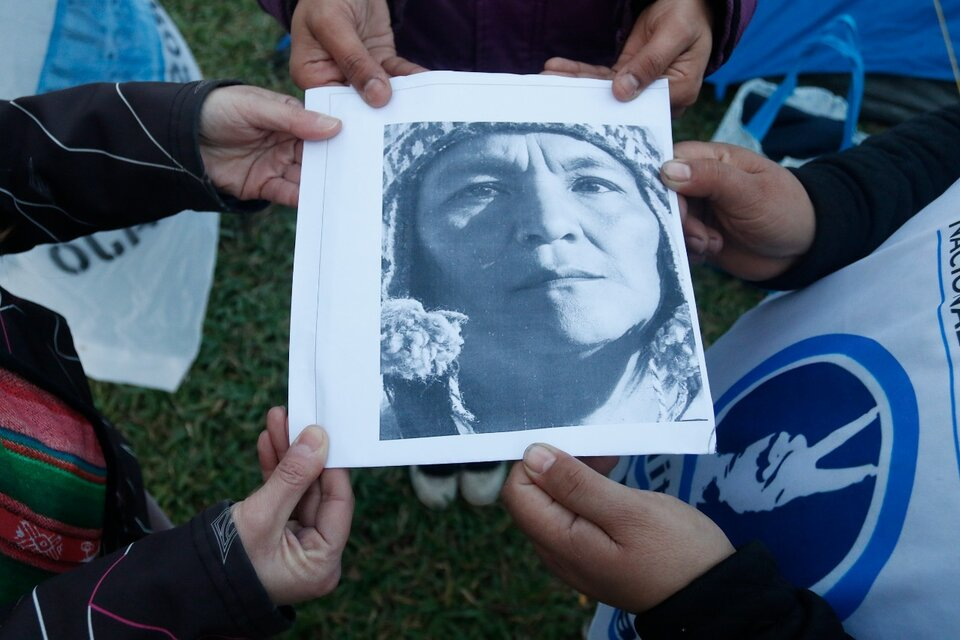

In [93]:
from IPython.display import Image
Image(img_request.content)

In [97]:
# reto: guardar la imagen en formato jpg
with open("p12_img.png", "wb") as png:
    png.write(img_request.content)

### +++ ensamblando scrapper final
lo que nuestro scrapper final hara sera:    
1. ir a la pagina de noticias pagina12
2. obtener el URL hacia todas las secciones. como:  El país, Economía, Sociedad, Espectáculos, Deportes, Ciencia, El mundo, etc.
3. ir a cada seccion y obtener el link hacia todas las notas (noticia) de la pantalla
4. crear un diccionario de cada nota que incluya:
    - fecha
    - titulo
    - volanta (subtitulo)
    - copete (resumen)
    - imagen 
    - cuerpo

In [99]:
def obtener_urls_secciones():
    url= "https://www.pagina12.com.ar/"
    try:
        p12 = requests.get(url)
    except Exception as e:
        print('Error scrapeando URL', url)
        print(e)
        return None
    if p12.status_code != 200:
        print(f'Error obteniendo nota {url}')
        print(f'Status Code = {p12.status_code}')
        return None
    sp = BeautifulSoup(p12.text, 'lxml')
    secciones = sp.find("ul", attrs={'class':'main-sections'}).find_all('li')
    links_secciones = []
    for sec in secciones: 
        try:
            links_secciones.append(sec.a.get('href'))
        except: 
            pass
    return links_secciones
links_secciones = obtener_urls_secciones()
print("secciones encontradas: ", len(links_secciones))
links_secciones

secciones encontradas:  7


['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo']

#### medir avance 
para medir el grado de avance usaremos:
https://stackoverflow.com/questions/42212810/tqdm-in-jupyter-notebook-prints-new-progress-bars-repeatedly


In [126]:
from tqdm import tqdm
import sys
from time import sleep

# el codigo para medir el avance funciona con la siguiente logica
values = ["a",4,5]
with tqdm(total=len(values), file=sys.stdout) as pbar:
    for i, n in enumerate(values):
        pbar.set_description('processed: %d' % (1 + i))
        pbar.update(1)
        sleep(1)

processed: 3: 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]


In [162]:
def obtener_urls_notas(section_url):
    urls_notas_seccion = []
    sec = requests.get(section_url)
    soup_seccion = BeautifulSoup(sec.text, 'lxml')
    articles_title = soup_seccion.find_all(['h2','h3','h4'], attrs={'class':'title-list'}) 
    for url in articles_title:
        if url.a:
            urls_notas_seccion.append(['https://www.pagina12.com.ar' + url.a.get('href')])    
    return urls_notas_seccion

def obtener_urls_de_todas_las_notas(links_secciones): 
    all_urls_notas = []
    with tqdm(total=len(links_secciones), file=sys.stdout) as pbar: #  para medir el grado de avance 
        for i, link in enumerate(links_secciones):
            try:
                r = requests.get(link)
                if r.status_code == 200:
                    all_urls_notas.extend(obtener_urls_notas(r.url)) # extend crea una sola lista, y no una lista de listas.
                else:
                    print('No se pudo obtener la sección', link)
            except:
                print('No se pudo obtener la sección', link)
            
            pbar.set_description('processed: %d' % (1 + i)) # imprime el grado de avance
            pbar.update(1)

    return all_urls_notas

all_urls_notas = obtener_urls_de_todas_las_notas(links_secciones)

all_urls_notas_flatten = sum(all_urls_notas, []) # dado que tenemos una lista de listas tenemos que aplanarlas como en numpy para poder usarlas en for

print("notas encontradas: ", len(all_urls_notas_flatten))
all_urls_notas_flatten[:4]

processed: 7: 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]
notas encontradas:  66


['https://www.pagina12.com.ar/516651-alberto-fernandez-mi-unica-preocupacion-es-que-argentina-se-',
 'https://www.pagina12.com.ar/512883-cuando-es-el-feriado-de-carnaval-2023-y-que-dias-cae',
 'https://www.pagina12.com.ar/516630-expectativa-en-diputados-por-la-convocatoria-para-sesiones-e',
 'https://www.pagina12.com.ar/516595-interpol-busca-al-hermano-de-miguel-cherutti-por-crimenes-de']

In [147]:
def obtener_info(s_nota):
    
    # Creamos un diccionario vacío para poblarlo con la información
    ret_dict = {}
    # Extraemos la fecha
    fecha = s_nota.find('div', attrs={'class':'date modification-date'}).span.time 
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime').split("T")[0]
    else:
        ret_dict['fecha'] = None
    
    # Extraemos el título
    titulo = s_nota.find('h1') 
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None

    # Extraemos la volanta
    volanta = s_nota.find('h3')
    if volanta:
        ret_dict['volanta'] = volanta.get_text()
    else:
        ret_dict['volanta'] = None
    
    # Extraemos el copete
    copete = s_nota.find('h2')
    if copete:
        ret_dict['copete'] = copete.get_text()
    else:
        ret_dict['copete'] = None
    
    # author name 
    autor = s_nota.find('div', attrs={'class':'author-name'})
    if autor:
        ret_dict['autor'] = autor.get_text()
    else:
        ret_dict['autor'] = None
    
    # Extraemos la imagen
    media = s_nota.find('figure', attrs={'class': ['object-fit-block--contain', 'intrinsic-container', 'intrinsic-container-3x2']}).img
    if media:
        img_src = media.get("src")
        try:
            img_req = requests.get(img_src)
            if img_req.status_code == 200:
                ret_dict['imagen'] = img_req.content
            else:
                ret_dict['imagen'] = None
        except:
            print('No se pudo obtener la imagen')
    else:
        print('No se encontró media')
    # Extraemos el cuerpo de la nota
    cuerpo = s_nota.find('div', attrs={'class':'article-text'})
    if cuerpo:
        ret_dict['texto'] = cuerpo.get_text()
    else:
        ret_dict['texto'] = None
    return ret_dict

con este codigo pruebas lo anterior
```python
uuurl= "https://www.pagina12.com.ar/516489-maria-eugenia-vidal-suma-a-dario-nieto-a-su-equipo-de-campan"
p20 = requests.get(uuurl)
sopa = BeautifulSoup(p20.text, 'lxml')
obtener_info(sopa)
```

In [148]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print('Error scrapeando URL', url)
        print(e)
        return None
    
    if nota.status_code != 200:
        print(f'Error obteniendo nota {URL}')
        print(f'Status Code = {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    ret_dict = obtener_info(s_nota)
    ret_dict['url'] = url
    
    return ret_dict

In [172]:
def crear_list_de_dicts_de_la_data_de_las_notas(all_urls_notas):
    data = []
    with tqdm(total=len(all_urls_notas), file=sys.stdout) as pbar: #  para medir el grado de avance 
        for i, url in enumerate(all_urls_notas):
            data.append(scrape_nota(url))      
            pbar.set_description('processed: %d' % (1 + i)) # imprime el grado de avance
            pbar.update(1)    
            print("  listo!!!")
    return data
# urls_notes = all_urls_notas_flatten[0:10] # para mas rapides 
data = crear_list_de_dicts_de_la_data_de_las_notas(all_urls_notas_flatten)

processed: 66: 100%|██████████| 66/66 [01:28<00:00,  1.34s/it]


In [173]:
print(len(data))
#data[1]

66


### guardar la data scrapeada
guardaremos todo lo que scrapeamos en un DataFrame y  en un archivo CSV

In [169]:
import pandas as pd

In [186]:
df = pd.DataFrame(data[0:1]) # tenemos 66 notas pero para ahorrar espacio solo guardaremos 1 notas 
df.head(3) # vemos como en automatico organiza la lista de dicts en un solo DF

,fecha,titulo,volanta,copete,autor,imagen,texto,url
0,2023-01-18,"Alberto Fernández: ""Mi única preocupación es q...",Ampliación de la Planta Depuradora de Líquidos...,En Presidente viajó a Mendoza y lamentó la aus...,None,"b'\xff\xd8\xff\xe1\x00""Exif\x00\x00MM\x00*\x00...",El presidente Alberto Fernández inauguró este ...,https://www.pagina12.com.ar/516651-alberto-fer...


In [187]:
# guardamos el df indicando la fecha del scraping
df.to_csv('notas_pagina12.csv')
# de 61 notas el CSV peso 27mb = 0.44mb x nota